In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [4]:
train_data.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [5]:
train_data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [6]:
##  Check if any null values in dataframe
train_data.isnull().sum().sum()
## No observations are Nan or None

0

In [7]:
# Drop duplicate records
train_data = train_data.drop("ID", axis=1)
original_records = train_data.shape[0]

train_data = train_data.drop_duplicates()
print(f"Dropped {original_records - train_data.shape[0]} duplicate records")

Dropped 4807 duplicate records


<Axes: xlabel='TARGET', ylabel='count'>

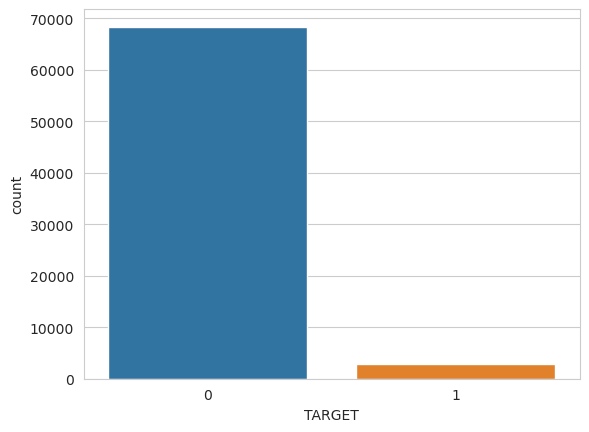

In [8]:
# Check Distribution of observations based on TARGET columns
sns.set_style('whitegrid')
sns.countplot(x = 'TARGET', data = train_data)

In [9]:
## Count of class 0 and 1
train_data.TARGET.value_counts()

TARGET
0    68398
1     2815
Name: count, dtype: int64

In [10]:
#Spilt design matrix and target column
X = train_data.drop(['TARGET'], axis = 1)
y = train_data['TARGET']

In [13]:
# Split train test split with 20% test data and stratified to ensure equal distribution of observations
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, stratify = y)

In [15]:
# Identify categorical columns based on unique values. All categorical features would have value as [0,1] only
i= 0 
categorical_columns =[]
for col in X_train.columns:
  uniques = X_train[col].unique()
  if all([unique in [0,1] for unique in uniques]):
    i+=1
    categorical_columns.append(col)
    # print(f"{i} : {col} -- {uniques}")
len(categorical_columns)

100

In [16]:
#Separate categorical and numeric features for correlation and scaling
X_train_cat = X_train[categorical_columns]
X_test_cat = X_test[categorical_columns]

X_train_num = X_train.drop(categorical_columns, axis=1)
X_test_num = X_test.drop(categorical_columns, axis=1)

In [17]:
X_train.shape, X_test.shape

((56970, 369), (14243, 369))

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import roc_auc_score, classification_report, f1_score, recall_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error, log_loss, recall_score


In [20]:
o_log_model = LogisticRegression(random_state = 0, max_iter = 10000)
o_log_model.fit(X_train, y_train)

/home/akshirsagar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10000, random_state=0)

In [24]:
y_pred = o_log_model.predict(X_test)
o_log_model_accuracy = accuracy_score(y_test, y_pred)
o_log_model_auc = roc_auc_score(y_test, o_log_model.predict_proba(X_test)[:,1])
o_log_model_recall = recall_score(y_test, y_pred)
o_log_model_f1 = f1_score(y_test, y_pred)

print("Logistic Regression model trained using oversampled data")
print(f''' 
accuracy = {o_log_model_accuracy:.3f}
auc_score = {o_log_model_auc:.3f}
recall = {o_log_model_recall:.3f}
f1 = {o_log_model_f1:.3f}''')
print(o_log_model_f1)

Logistic Regression model trained using oversampled data
 
accuracy = 0.960
auc_score = 0.629
recall = 0.000
f1 = 0.000
0.0


In [25]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98     13680
           1       0.00      0.00      0.00       563

    accuracy                           0.96     14243
   macro avg       0.48      0.50      0.49     14243
weighted avg       0.92      0.96      0.94     14243



/home/akshirsagar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/akshirsagar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/akshirsagar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [26]:
#Classification report on train dataset
print(classification_report(y_test, o_log_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     13680
           1       0.00      0.00      0.00       563

    accuracy                           0.96     14243
   macro avg       0.48      0.50      0.49     14243
weighted avg       0.92      0.96      0.94     14243



/home/akshirsagar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/akshirsagar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/akshirsagar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)